### In this notebook we study the lepton jet reconstruction in terms of the Lxy.

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)


<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    #"2Mu2E_100GeV_5GeV_40mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    #"2Mu2E_200GeV_5GeV_2mm",
    #"2Mu2E_500GeV_5GeV_0p8mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_1000GeV_5GeV_40mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        "2mu2e",
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Not applying any cuts to the lepton jets for channel  baseNoLj

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

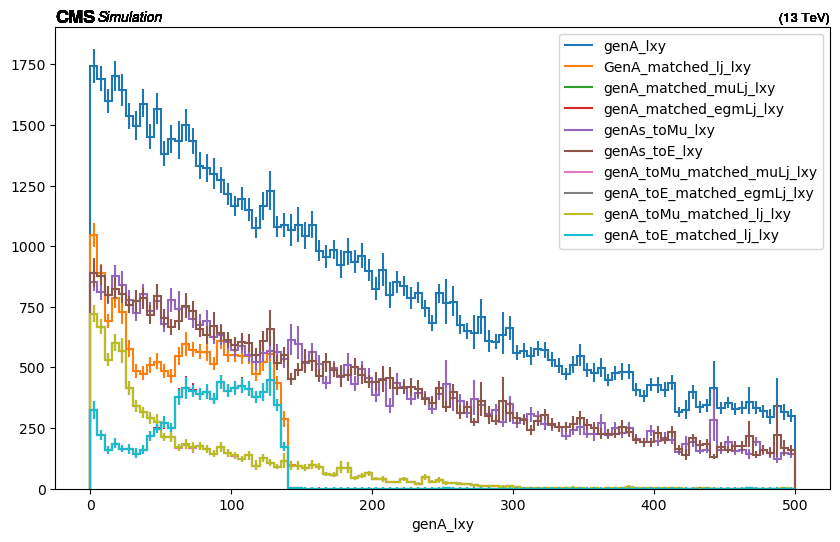

In [4]:
ch1 ="baseNoLj"
ch2="2mu2e"
plt.figure(figsize=(10,6))
utilities.plot([output["out"][f"{name}"]["hists"]["genA_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_matched_lj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_matched_muLj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_matched_egmLj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toE_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_matched_lj_lxy"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_matched_lj_lxy"][ch1,:] for name in samples], density=False)

plt.legend(["genA_lxy","GenA_matched_lj_lxy", "genA_matched_muLj_lxy", "genA_matched_egmLj_lxy",
            "genAs_toMu_lxy", "genAs_toE_lxy", "genA_toMu_matched_muLj_lxy", "genA_toE_matched_egmLj_lxy",
            "genA_toMu_matched_lj_lxy", "genA_toE_matched_lj_lxy"])

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

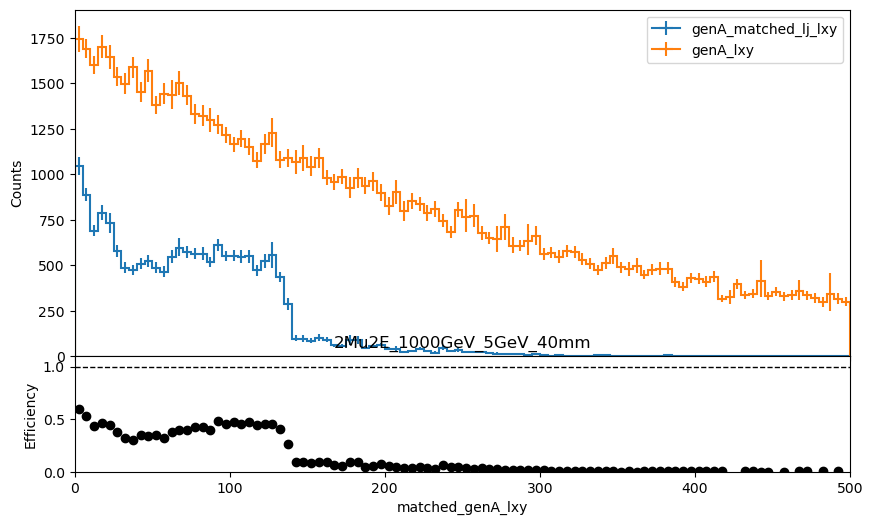

In [5]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_lj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_lxy"][ch1,:], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_lxy",
       rp_denom_label="genA_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")


Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

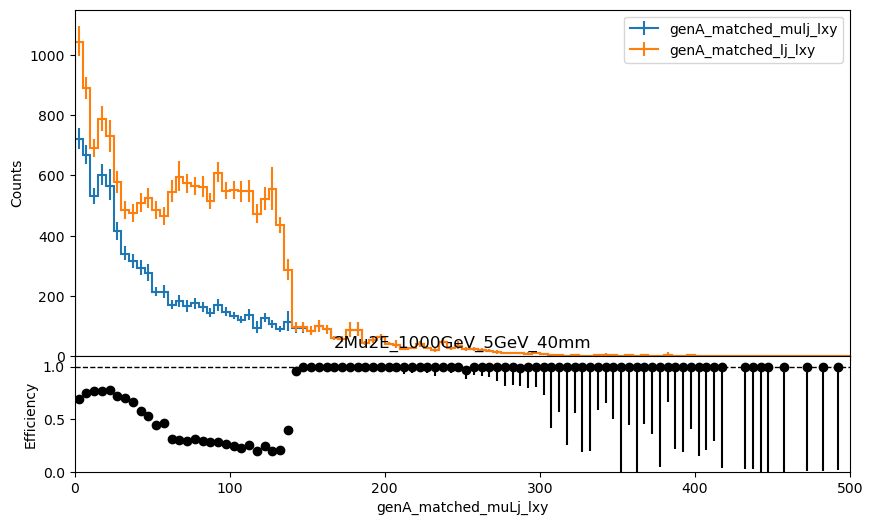

In [6]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_lj_lxy"][ch1,:], 
       rp_num_label="genA_matched_mulj_lxy",
       rp_denom_label="genA_matched_lj_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")


Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

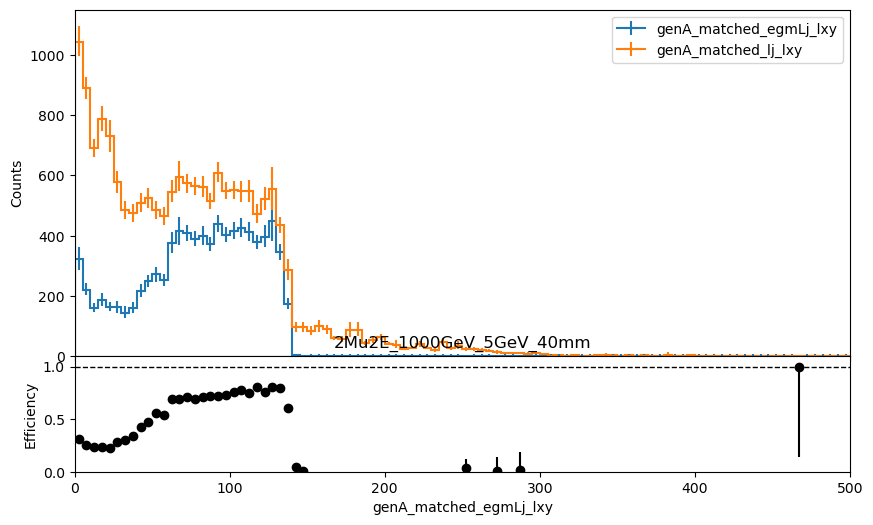

In [7]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_lj_lxy"][ch1,:], 
       rp_num_label="genA_matched_egmLj_lxy",
       rp_denom_label="genA_matched_lj_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")


Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

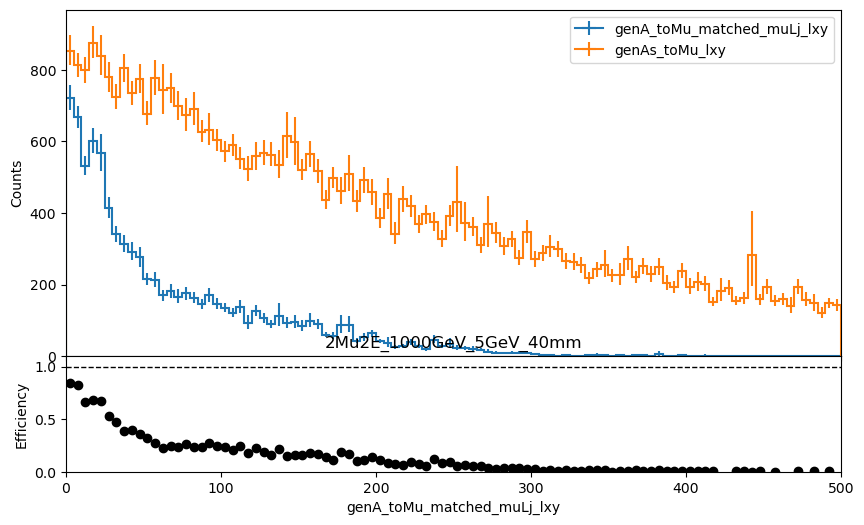

In [25]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toMu_lxy"][ch1,:], 
       rp_num_label="genA_toMu_matched_muLj_lxy",
       rp_denom_label="genAs_toMu_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")


Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

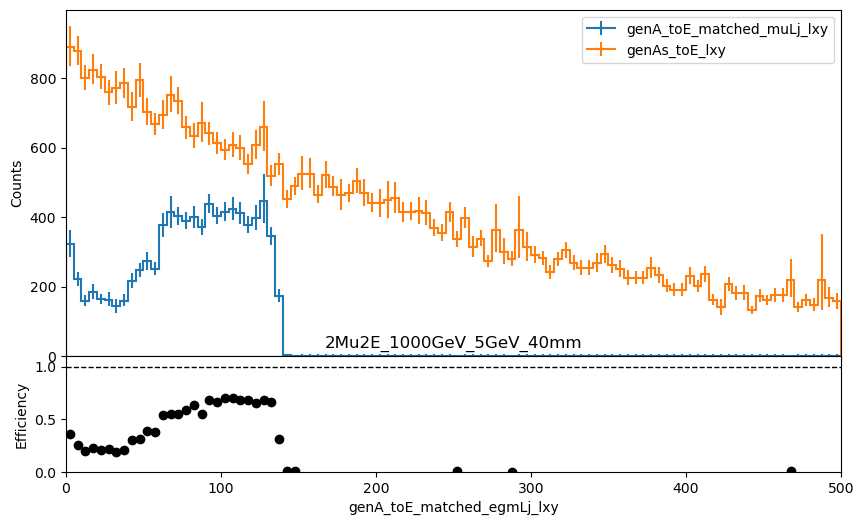

In [28]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_muLj_lxy",
       rp_denom_label="genAs_toE_lxy",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_40mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_40mm')

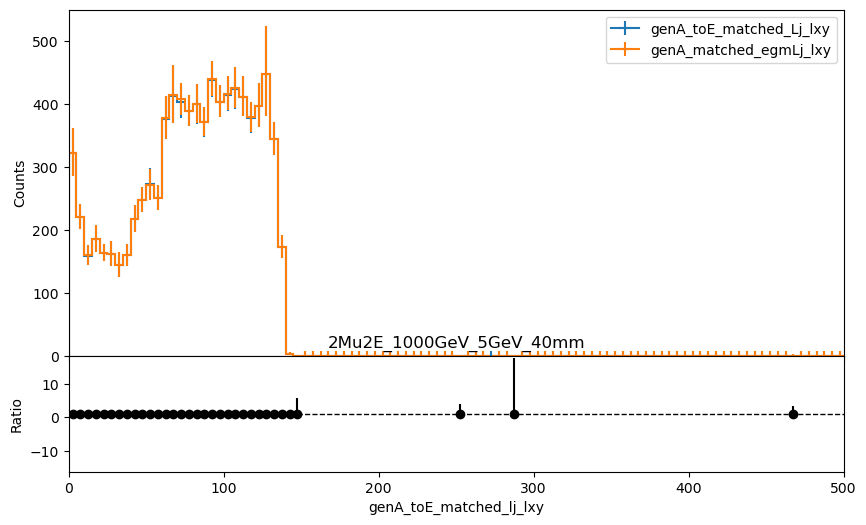

In [18]:
plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_lj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_matched_egmLj_lxy"][ch1,:], 
       rp_num_label="genA_toE_matched_Lj_lxy",
       rp_denom_label="genA_matched_egmLj_lxy",
       rp_uncert_draw_type="line",
       #rp_uncertainty_type="efficiency"
       )
plt.title("2Mu2E_1000GeV_5GeV_40mm")


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f67367055e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

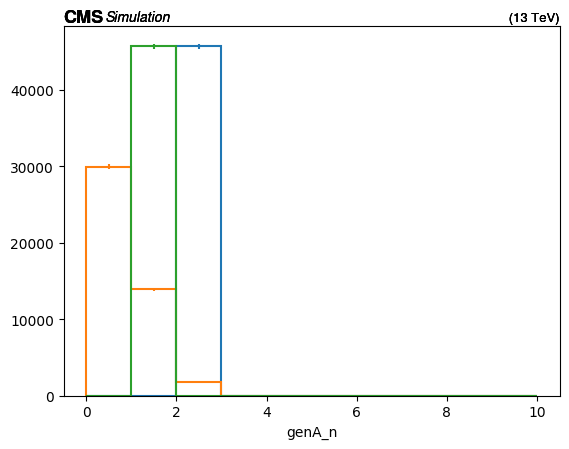

In [9]:
utilities.plot([output["out"][f"{name}"]["hists"]["genA_n"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_matched_lj_n"][ch1,:] for name in samples], density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genAs_toMu_n"][ch1,:] for name in samples], density=False)

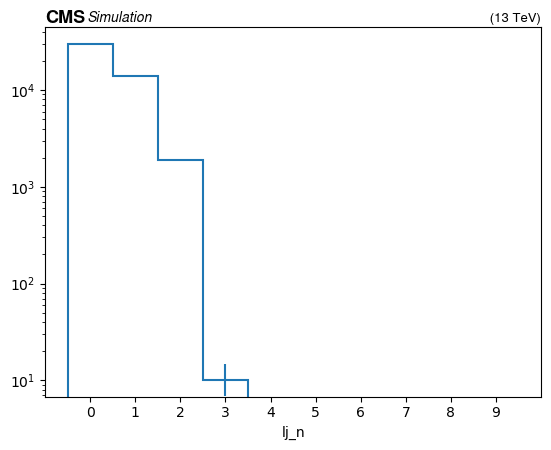

In [10]:
utilities.plot([output["out"][f"{name}"]["hists"]["lj_n"][ch1,:] for name in samples], density=False)
plt.yscale("log")